# <span style="color:Purple"> Numerical Simulation Laboratory : Exercise 3 </span>



### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$ (prezzo pattuito al tempo finale)
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

Cosa è giusto far pagare l'opzione a chi si assume il rischio? La soluzione di Black and Scholes è esatta. Conosciamo la distribuzione finale dei prezzi del moto geometrico. Posso campionarla oppure simularla. Questo perchè le soluzioni sono esatte. Normalmente è più complicato, bisogna integrare l'equazione differenziale stocastica in modo approssimato. 

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<p style="border:2px; border-style:solid; border-color:#F5F5F5; padding: 1em; background-color:#F5F5F5">
    Remember that given an asset price $S\sim GBM(\mu,\sigma^2)$, with initial value $S(0)$, then
    $$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right]$$
    where $W(t)\sim\mathcal{N}(0,t)$.
    Moreover, since the increments of $W$ are independent and normally distributed, the simple recursive procedure for sampling discretized values of $S\sim GBM(\mu,\sigma^2)$ at $t_1 < t_2 < … < t_n$ is:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    with $Z_i \sim \mathcal{N}(0,1)$
</p>

W(t) processo di Wiener, distrubuito in modo normale con varianza che va come t. La seconda formula è discretizzata nei sottointervalli. E' sempre esatta. Z: variabile normale a varianza 1.

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

# Esercizio 3.1 - <span style="color:deeppink"> Plain vanilla option pricing </span>

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

In [2]:
sum_prog , error_prog = np.loadtxt( "data.csv" , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
call_expected = 14.975790778311286
put_expected = 5.4595325819072364

In [3]:
call , put , call_2 , put_2 = np.split(sum_prog , 4) 
err_call , err_put , err_call2 , err_put2 = np.split(error_prog , 4)

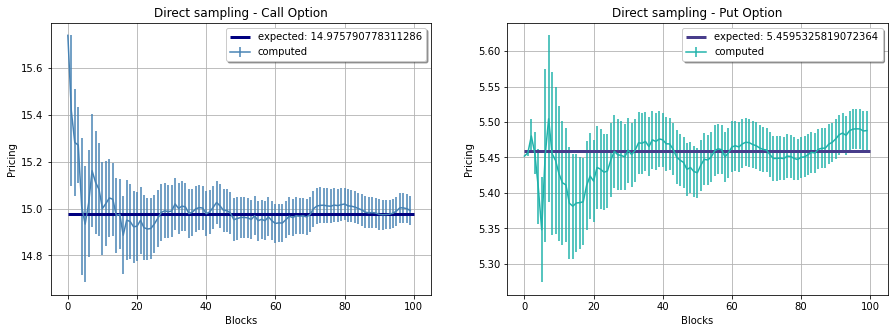

In [4]:
fig, ((ax0 , ax1))   = plt.subplots(1, 2, figsize=(15,5))
ax0.errorbar( np.arange(len(call)) , call , yerr=err_call , color="steelblue"  , label= "computed" )
ax1.errorbar( np.arange(len(put)), put , yerr=err_put , color="lightseagreen"  , label= "computed" )

ax0.hlines( call_expected , 0 , 100 , label="expected: "+str(call_expected) , color="navy" , linewidth=3)
ax1.hlines( put_expected , 0 , 100 , label ="expected: "+str(put_expected) , color="darkslateblue" , linewidth=3)
ax0.grid(True)
ax1.grid(True)

ax0.set_title("Direct sampling - Call Option")
ax1.set_title("Direct sampling - Put Option")

ax0.set_xlabel('Blocks')
ax0.set_ylabel('Pricing')
ax1.set_xlabel('Blocks')
ax1.set_ylabel('Pricing')

ax0.legend(loc="best" , shadow=True)
ax1.legend(loc="best" , shadow=True)

I grafici mostrano la stima progressiva del prezzo di un'opzione europea di tipo call e put rispettivamente. Le stime si sono ottenute utilizzando il metodo del data blocking, per ogni blocco sono state eseguite $10^5$ simulazioni. In questo caso, essendo la distribuzione finale dei prezzi nota (GBM), abbiamo campionato direttamente da essa il prezzo al tempo T per ciascuna simulazione. Il metodo delle medie a blocchi ha permesso la stima dell'incertezza, mostrata nel grafico, mentre il valore atteso è stato calcolato a partire dalla soluzione analitica esatta di Black-Scholes.

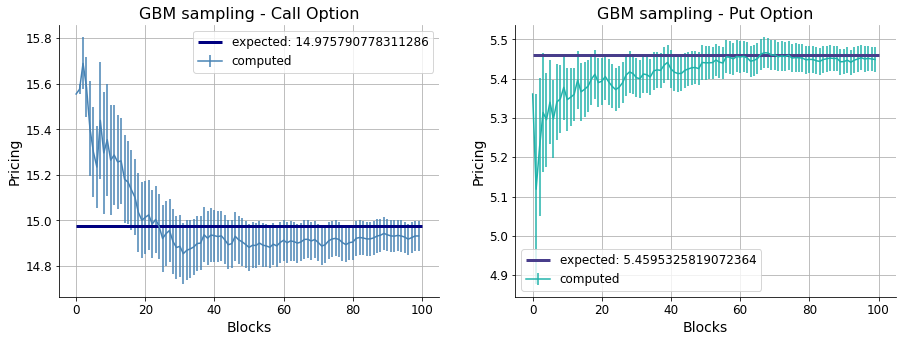

In [42]:
fig, ((ax0 , ax1))   = plt.subplots(1, 2, figsize=(15 , 5))
ax0.errorbar( np.arange(len(call)) , call_2 , yerr=err_call2 , color="steelblue"  , label= "computed" )
ax1.errorbar( np.arange(len(put)) , put_2 , yerr=err_put2 , color="lightseagreen"  , label= "computed" )

ax0.set_title("GBM sampling - Call Option")
ax1.set_title("GBM sampling - Put Option")

ax0.hlines( call_expected , 0 , 100 , label="expected: "+str(call_expected)  , color="navy" , linewidth=3)
ax1.hlines( put_expected , 0 , 100 , label ="expected: "+str(put_expected) , color="darkslateblue" , linewidth=3)

ax0.grid(True)
ax1.grid(True)

ax0.set_xlabel('Blocks')
ax0.set_ylabel('Pricing')
ax1.set_xlabel('Blocks')
ax1.set_ylabel('Pricing')

ax0.legend()
ax1.legend()

Questi grafici sono simili ai precedenti, la differenza sta nel fatto che in questo caso il prezzo al tempo T in ciascuna delle $10^5$ simulazioni per blocco è stato ottenuto simulando direttamente un moto brawniano geometrico discretizzato (in 100 step in questo caso), e ricavando così la stima del prezzo al tempo T. 